# Case Study - Image Classification using Deep CNN in Keras.


<h1>Context<h1/>

- The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
- The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
- There are 6,000 images of each class.

<h2>Understand the labels:<h2/>

- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

## Add-on:
What type of classification is this?

<h1>Problem Statement<h1/>

- Image Classification using Deep CNN in Keras and also some edge detection operation.


<h1>Import all necessary modules and load the data<h1/>

In [ ]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [ ]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# Print the shape of dataset.
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
x_train[0, :, :, :].shape

(32, 32, 3)

## Highlights:
- How to select the 10th image?
- How to get the red pixels only?
- What is the shape of resulting array?

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
y_train[11][0]

7

- The training set contains 50000 images.
- The size of each image is 32x32 pixels.
- Each image has 3 color channels.

- The label of image at index = 0 is 6:"frog".

In [ ]:
label_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


<h2>Explore the Data<h3/>

- Understanding a dataset is part of making predictions on the data.
- It answers some of questions like in a given data..
  - "What are the possible labels?"
  - "What is the range of pixel values for the image data?"


Label 
 Label Id: 9 
 Name: truck


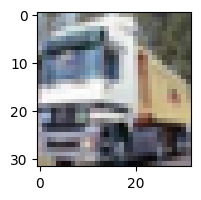

In [ ]:
plt.figure(figsize=(2,2))

i = 1
image = x_train[i]
label = y_train[i][0]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

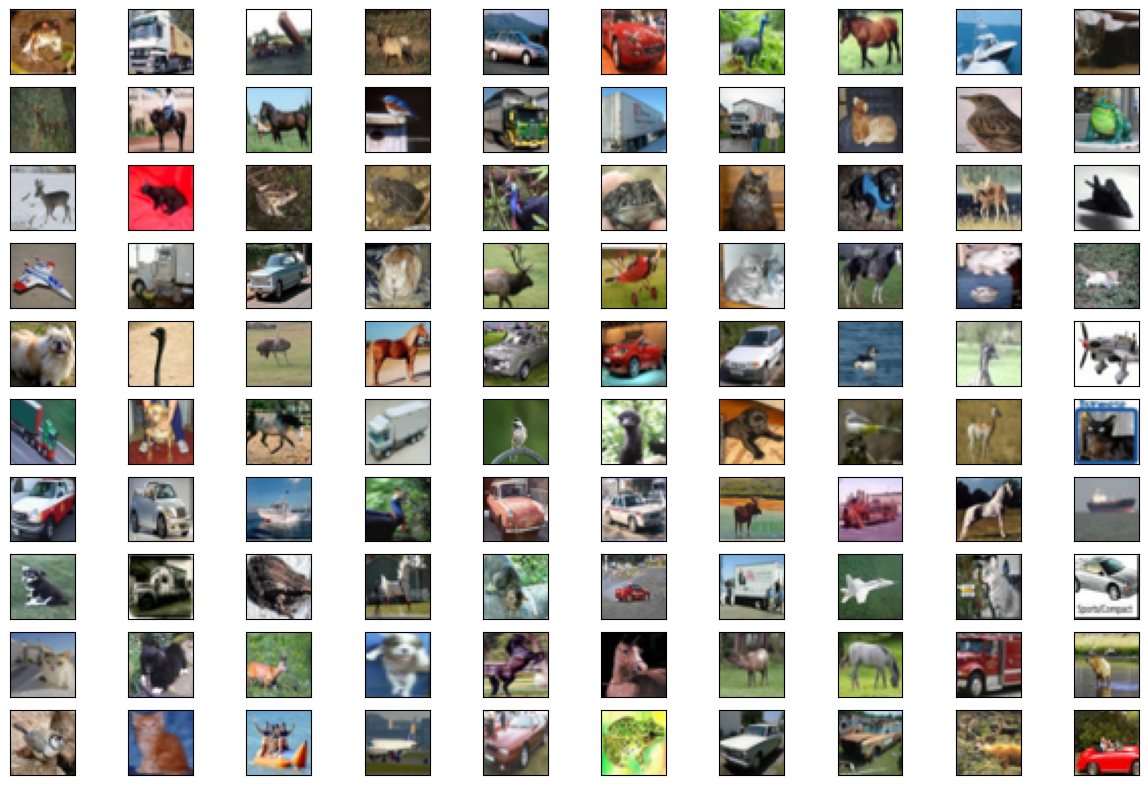

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(15,15))

for i in range(100):
    plt.subplot(15,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


plt.show()

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Add-on:
- Without checking, what is the shape of `image`
- How to rewrite the print statement using `f-string`?

- The above image of a frog.
- The Label ID is 6.
- As we can see the x-axis and y-axis of image, it shows that there are 32 pixels on each directions.

- As the image quality is not good, the edges are not so good. But still we can visualize that there are edges.

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

## Please Note:
There are many tools to one-hot encode and they differ in syntax, but the keras one is probably best implemented.
- `keras.utils.to_categorical`
- `sklearn.preprocessing.OneHotEncoder`
- `pandas get_dummies`

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# y = [[0], [1], [2], [3]]
y = [0, 1, 2, 3]
# ohe = OneHotEncoder()
# ohe.fit_transform(y).toarray()
pd.get_dummies(y)


,0,1,2,3
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


<h1>Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Convolutional layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 25%.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- GlobalMaxPooling2D layer.
- Fully connected layer with 256 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 10 units and a softmax activation function.


In [ ]:
x_train.shape[1:]

(32, 32, 3)

In [ ]:
# Set the CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
# softmax
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_9 (Bat  (None, 16, 16, 64)       

<h3>Conv2D:<h3/>

- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

<h3>Activation('relu'):<h3/>

- 'relu' stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

<h3>MaxPooling2D:<h3/>

- The objective MaxPooling Layer is to down-sample an input representation.
- This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn.

<h3>Dropout:<h3/>

- Dropout is a technique used to improve over-fit on neural networks.
- Basically during training half of neurons on a particular layer will be deactivated. This improve generalization.
- Normally some deep learning models use Dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating some kind of image noise augmentation.

<h3>Dense:<h3/>

- Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

<h3>Softmax:<h3/>

- The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems.
- Usually used when trying to handle multiple classes. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs.
______________

## Add-on:
How to handle multilabel classification?

<h4>When training the network, what you want is minimize the cost by applying a algorithm of your choice. It could be SGD, AdamOptimizer, AdagradOptimizer, or something. You have to study how each algorithm works to choose what to use, but AdamOptimizer works find for most cases in general.<h4/>

In [ ]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Add-on:
Which loss function to use? It depends :)

https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances

- The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

- It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

- Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [ ]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


<h2>Fit the model:<h2/>

-  We can fit this model with 40 epochs and a batch size of 32.

- A small number of epochs was chosen to quickly run the code so we can understand the concepts ahead. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

Epoch 1/40
1563/1563 [==============================] - 12s 6ms/step - loss: 1.8226 - accuracy: 0.3413 - val_loss: 1.6189 - val_accuracy: 0.4115
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4944 - accuracy: 0.4621 - val_loss: 1.3228 - val_accuracy: 0.5267
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3522 - accuracy: 0.5179 - val_loss: 1.0846 - val_accuracy: 0.6133
Epoch 4/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2610 - accuracy: 0.5558 - val_loss: 1.2152 - val_accuracy: 0.5780
Epoch 5/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1700 - accuracy: 0.5920 - val_loss: 0.9664 - val_accuracy: 0.6664
Epoch 6/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0950 - accuracy: 0.6176 - val_loss: 0.9886 - val_accuracy: 0.6527
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0375 - accuracy: 0.6403 - val_loss: 1.2114 - val_accur

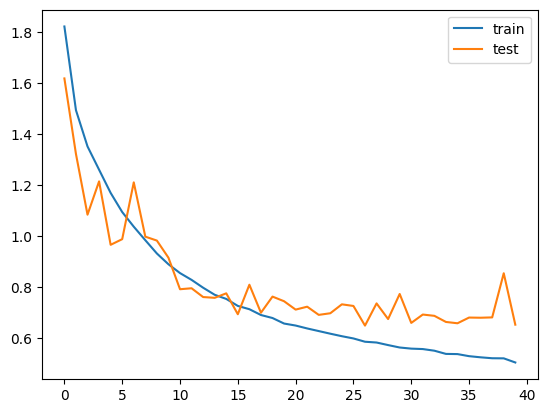

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=40,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1)

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<h2>Model Score:<h2/>

- Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# sigmoid

313/313 [==============================] - 1s 3ms/step - loss: 0.6532 - accuracy: 0.7832
Test loss: 0.6532303690910339
Test accuracy: 0.7832000255584717


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
preds = pd.DataFrame(predictions)
preds

,0,1,2,3,4,5,6,7,8,9
0,2.730061e-02,1.131622e-02,1.233987e-02,4.493551e-01,5.013350e-03,2.614837e-01,1.875517e-02,1.131652e-02,6.754976e-02,1.355697e-01
1,1.387447e-03,1.853659e-03,1.110434e-07,1.248932e-08,2.965195e-09,4.655639e-11,7.602275e-10,7.304427e-11,9.965829e-01,1.758834e-04
2,1.456840e-01,1.940179e-03,4.867179e-04,5.752950e-04,2.314671e-04,1.321952e-05,1.699839e-06,6.466146e-05,8.165747e-01,3.442810e-02
3,7.600762e-01,1.756097e-03,5.264609e-02,2.314669e-03,3.049864e-02,8.346546e-05,9.697946e-05,2.072127e-03,1.448569e-01,5.598865e-03
4,3.332298e-07,1.902996e-06,1.907027e-01,5.143096e-02,5.962190e-02,1.589442e-04,6.980513e-01,6.729795e-06,2.446482e-05,7.442269e-07
...,...,...,...,...,...,...,...,...,...,...
9995,1.309918e-02,5.812923e-03,7.455273e-03,7.621927e-01,7.619630e-03,6.665602e-02,1.668742e-02,2.599868e-03,1.157767e-01,2.100245e-03
9996,1.849433e-08,2.993337e-09,4.122180e-04,6.048185e-01,4.884598e-04,3.894954e-01,4.757400e-03,2.789818e-05,4.098100e-09,5.975364e-08
9997,2.079540e-06,5.141991e-09,4.317881e-02,1.733741e-02,1.083536e-05,9.269446e-01,1.949095e-04,1.232947e-02,1.713915e-06,2.192686e-07
9998,3.056725e-02,9.503312e-01,2.318089e-03,5.712924e-04,1.460968e-02,6.420906e-06,4.541182e-05,7.914770e-04,4.830014e-04,2.762096e-04


In [ ]:
# generate the confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)

pd.DataFrame(cm, columns=label_dict.values(), index=label_dict.values())


313/313 [==============================] - 1s 2ms/step


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,794,5,61,13,11,3,3,6,54,50
automobile,10,848,4,7,1,0,4,4,21,101
bird,46,2,691,44,88,45,27,29,16,12
cat,16,4,57,609,63,144,30,35,14,28
deer,15,1,41,53,786,19,11,59,10,5
dog,11,2,39,152,38,663,17,56,9,13
frog,4,4,32,69,66,25,782,4,5,9
horse,6,2,26,25,36,33,3,861,2,6
ship,26,14,11,9,2,1,4,6,899,28
truck,20,34,7,6,3,4,0,9,18,899


<h3>The above score shows that the accuracy is good, as we used number of epochs = 30.
If we use more epochs and tune the hyper-parameters more then we can get some more accuracy score. As our focus on the case study was to learn about the use of CNNs for image classification, we needed to run the code thoroughly so we set number of epochs to less. <h3/>

# Summary:

<h3>In this case study we discovered how to create deep CNNs in Keras for image classification.<h3/>

After working through this case study we learned:

- About the CIFAR-10 dataset and how to load it in Keras and plot examples from the dataset.
- How to train and evaluate a Convolutional Neural Network on the problem.


## Additional Reading Material Links:

- Benefits of using pooling layers https://stats.stackexchange.com/questions/288261/why-is-max-pooling-necessary-in-convolutional-neural-networks
- Why padding? https://stats.stackexchange.com/questions/246512/convolutional-layers-to-pad-or-not-to-pad
- More CNN's   
  - https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
- Neural Network Architectures  https://towardsdatascience.com/neural-network-architectures-156e5bad51ba

In [ ]:
#---END----